# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [106]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [88]:
spaceship.shape

(8693, 14)

**Check for data types**

In [89]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [108]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [109]:
spaceship = spaceship.dropna()
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [110]:
#split by '/' 
spaceship[['Cabin', 'Deck', 'Side']] = spaceship["Cabin"].str.split("/", expand = True)
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,P
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,S
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,S
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,S
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,98,P
8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1499,S
8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1500,S
8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,608,S


- Drop PassengerId and Name

In [111]:
spaceship.drop(columns = ["PassengerId", "Name"], inplace = True)

- For non-numerical columns, do dummies.

In [94]:
spaceship.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Side             object
dtype: object

In [112]:
spaceship["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [113]:
# label HomePlanet
# Earth = 0
# Mars = 1
# Europa = 2

def label_planets(planet):
        if planet == "Earth":
                return 0
        elif planet == "Mars":
                return 1
        else:
                return 2

spaceship["HomePlanet"] = spaceship["HomePlanet"].apply(label_planets)

In [114]:
#label CryoSleep 
# False = 0
# True = 1

def label_cryo(cryosleep):
        if cryosleep == False:
                return 0
        elif cryosleep == True:
                return 1
        
spaceship["CryoSleep"] = spaceship["CryoSleep"].apply(label_cryo)

In [115]:
spaceship["Cabin"].unique()

array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

In [116]:
# label Cabin
# A = 0
# B = 1
# C = 2
# ...
#  T = 7

def label_cabin(cabin):
        if cabin == "A":
                return 0
        elif cabin == "B":
                return 1
        elif cabin == "C":
                return 2
        elif cabin == "D":
                return 3
        elif cabin == "E":
                return 4
        elif cabin == "F":
                return 5
        elif cabin == "G":
                return 6
        else:
                return 7

spaceship["Cabin"] = spaceship["Cabin"].apply(label_cabin)


In [100]:
spaceship["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [117]:
# label Destination
# TRAPPIST-1e = 10
# PSO J318.5-22 = 11
# 55 Cancri e = 12

def label_destiny(planet):
        if planet == "TRAPPIST-1e":
                return 10
        elif planet == "PSO J318.5-22":
                return 11
        else:
                return 12

spaceship["Destination"] = spaceship["Destination"].apply(label_destiny)

In [119]:
# label Side
# S = 0
# P = 1

def label_side(side):
        if side == "S":
                return 0
        else:
                return 1

spaceship["Side"] = spaceship["Side"].apply(label_side)

In [120]:
spaceship.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,2,0,1,10,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1
1,0,0,5,10,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0
2,2,0,0,10,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0
3,2,0,0,10,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0
4,0,0,5,10,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0


In [121]:
#define VIP as int
spaceship["Deck"] = spaceship["Deck"].astype(int)

In [ ]:
#define VIP as boolean
#booleans are treated as 0 and 1 so we'll try this approach 
#does not work - cast type as int
spaceship["VIP"] = spaceship["VIP"].astype(int)

In [123]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,2,0,1,10,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1
1,0,0,5,10,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,0
2,2,0,0,10,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0
3,2,0,0,10,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0
4,0,0,5,10,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,0,12,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,98,1
8689,0,1,6,11,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1499,0
8690,0,0,6,10,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1500,0
8691,2,0,4,12,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,608,0


In [124]:
spaceship.dtypes

HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck              int64
Side              int64
dtype: object

In [125]:
spaceship.select_dtypes("number")

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,2,0,1,10,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,0,0,5,10,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0
2,2,0,0,10,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0
3,2,0,0,10,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0
4,0,0,5,10,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,0,12,41.0,1,0.0,6819.0,0.0,1643.0,74.0,98,1
8689,0,1,6,11,18.0,0,0.0,0.0,0.0,0.0,0.0,1499,0
8690,0,0,6,10,26.0,0,0.0,0.0,1872.0,1.0,0.0,1500,0
8691,2,0,4,12,32.0,0,0.0,1049.0,0.0,353.0,3235.0,608,0


**Perform Train Test Split**

In [126]:
# split df in features and target
features = spaceship.drop("Transported", axis=1)
target = spaceship["Transported"]

display(features)
display(target)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,2,0,1,10,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,0,0,5,10,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0
2,2,0,0,10,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0
3,2,0,0,10,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0
4,0,0,5,10,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,0,12,41.0,1,0.0,6819.0,0.0,1643.0,74.0,98,1
8689,0,1,6,11,18.0,0,0.0,0.0,0.0,0.0,0.0,1499,0
8690,0,0,6,10,26.0,0,0.0,0.0,1872.0,1.0,0.0,1500,0
8691,2,0,4,12,32.0,0,0.0,1049.0,0.0,353.0,3235.0,608,0


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6606, dtype: bool

In [127]:
#split into test and train data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.20)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [128]:
#initialize the knn model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [129]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

- Evaluate your model's performance. Comment it

In [130]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

pred = knn.predict(X_test)

print(f"R2 score: ", knn.score(X_test, y_test))
print(f"RMSE: ", root_mean_squared_error(y_test, pred))
print(f"MAE: ", mean_absolute_error(y_test, pred))

R2 score:  0.2379175593766596
RMSE:  0.4364621903101665
MAE:  0.30196671709531014


we get a R2 score of only 0.238 which is very low. will normalize and scale/standardize the data to improve the model

### normalization

In [131]:
#creating the normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#MixMax will scale values between 0 and 1
normalizer = MinMaxScaler()
#normalizer = StandardScaler()

In [132]:
normalizer.fit(X_train)

MinMaxScaler()

In [133]:
#transform training and testing data - needed to transform both so the results are comparable
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [134]:
#creating a df for this data
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

display(X_train_norm)
display(X_test_norm)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1.0,1.0,0.142857,1.0,0.316456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.155755,0.0
1,0.0,1.0,0.857143,0.0,0.278481,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.255016,0.0
2,0.0,0.0,0.714286,0.0,0.303797,0.0,0.000000,0.000000,0.000490,0.036883,0.000000,0.170011,1.0
3,0.5,0.0,0.714286,1.0,0.303797,0.0,0.074294,0.009828,0.024565,0.000000,0.000000,0.680570,1.0
4,0.0,0.0,0.714286,0.0,0.405063,0.0,0.000000,0.000302,0.000898,0.042214,0.003640,0.277191,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,1.0,0.0,0.285714,1.0,0.443038,0.0,0.005444,0.016536,0.000979,0.360274,0.014619,0.102429,0.0
5280,0.5,0.0,0.571429,0.0,0.341772,0.0,0.100202,0.000000,0.002122,0.000054,0.000000,0.154171,0.0
5281,1.0,0.0,0.142857,1.0,0.417722,1.0,0.000000,0.049408,0.088876,0.306914,0.084711,0.097677,1.0
5282,0.0,0.0,0.714286,0.5,0.164557,0.0,0.000000,0.000067,0.039174,0.000538,0.010170,0.222281,1.0


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1.0,1.0,0.285714,1.0,0.607595,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.043295,1.0
1,0.0,0.0,0.857143,0.0,0.303797,0.0,0.00000,0.000000,0.000000,0.000000,0.047729,0.543295,1.0
2,0.0,0.0,0.857143,1.0,0.759494,0.0,0.00000,0.000000,0.000000,0.000431,0.040333,0.581837,0.0
3,0.0,1.0,0.857143,0.5,0.316456,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.681098,0.0
4,0.0,0.0,0.714286,0.0,0.556962,0.0,0.07006,0.000034,0.001306,0.000000,0.000000,0.039071,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,1.0,0.0,0.428571,0.0,0.759494,0.0,0.00000,0.006373,0.000245,0.105751,0.001734,0.100317,0.0
1318,0.0,0.0,0.714286,0.0,0.316456,0.0,0.13629,0.000000,0.000000,0.001292,0.046169,0.042239,0.0
1319,1.0,0.0,0.285714,0.0,0.556962,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.079725,1.0
1320,0.0,1.0,0.857143,0.5,0.417722,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.783527,1.0


In [135]:
#upgrade the model
knn = KNeighborsRegressor()

In [136]:
#train the model with the normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [137]:
pred = knn.predict(X_test_norm)

print(f"R2 score: ", knn.score(X_test_norm, y_test))
print(f"RMSE: ", root_mean_squared_error(y_test, pred))
print(f"MAE: ", mean_absolute_error(y_test, pred))

R2 score:  0.28512406379900757
RMSE:  0.42272797517846766
MAE:  0.29561270801815437


small upgrade from 0.238 to 0.285. No meaningful changes in RMSE or MAE. will proceed with feature selection 

with standard scaler we can improve the R2 score to 0.436
### feature selection

In [138]:
spaceship.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,2,0,1,10,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1
1,0,0,5,10,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,0
2,2,0,0,10,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0
3,2,0,0,10,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0
4,0,0,5,10,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,0


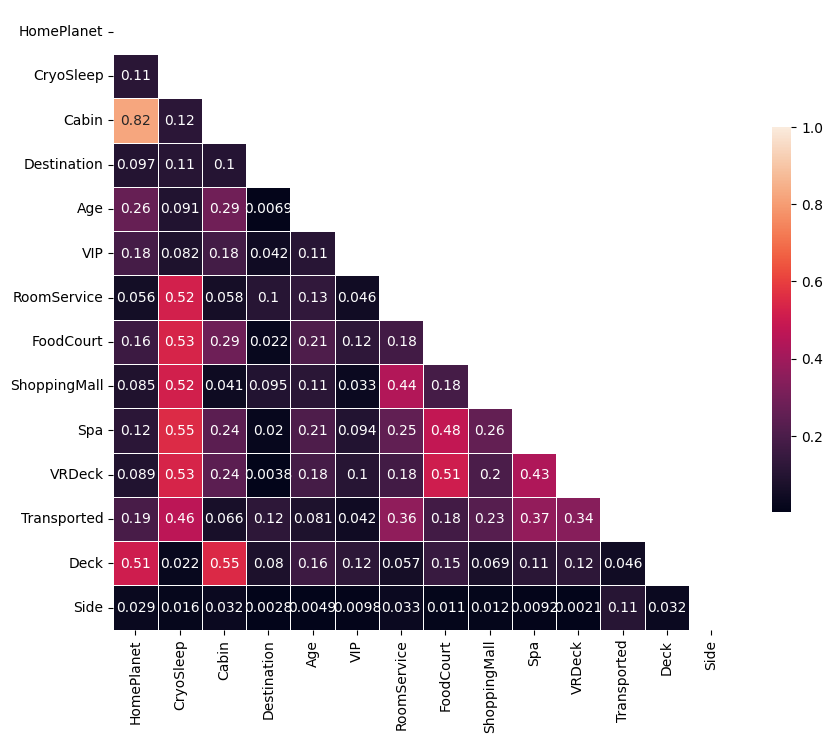

In [139]:
corr = np.abs(spaceship.corr(method="spearman"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [140]:
# low correlation with target "Transported": "Cabin", "Age", "VIP" - drop them
X_train_reduced = X_train_norm.drop(columns = ["Cabin", "Age", "VIP"])
X_test_reduced = X_test_norm.drop(columns = ["Cabin", "Age", "VIP"])

# high correlation between features but not with target: 
# Cabin - already dropped - highly correlated with HomePlanet
#will continue as such


In [145]:
# we fit the model again
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

KNeighborsRegressor(n_neighbors=10)

In [146]:
#evaluate the model
pred = knn.predict(X_test_reduced)

print(f"R2 score: ", knn.score(X_test_reduced, y_test))
print(f"RMSE: ", root_mean_squared_error(y_test, pred))
print(f"MAE: ", mean_absolute_error(y_test, pred))

R2 score:  0.36153202768774384
RMSE:  0.3994985510416997
MAE:  0.29447806354009076


another small increase in the model score (efficiency???) to 0.362. 

dropping any feature with correlation lower than 0.30

In [149]:
X_train_reduced = X_train_norm.drop(columns = ["Cabin", "Age", "VIP", "HomePlanet", "Destination", "FoodCourt", "ShoppingMall"])
X_test_reduced = X_test_norm.drop(columns = ["Cabin", "Age", "VIP", "HomePlanet", "Destination", "FoodCourt", "ShoppingMall"])

In [150]:
# we fit the model again
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

KNeighborsRegressor(n_neighbors=10)

In [151]:
#evaluate the model
pred = knn.predict(X_test_reduced)

print(f"R2 score: ", knn.score(X_test_reduced, y_test))
print(f"RMSE: ", root_mean_squared_error(y_test, pred))
print(f"MAE: ", mean_absolute_error(y_test, pred))

R2 score:  0.29187217308502267
RMSE:  0.420728062855846
MAE:  0.3197428139183056


In [152]:
X_train_reduced.head()

,CryoSleep,RoomService,Spa,VRDeck,Deck,Side
0,1.0,0.000000,0.000000,0.00000,0.155755,0.0
1,1.0,0.000000,0.000000,0.00000,0.255016,0.0
2,0.0,0.000000,0.036883,0.00000,0.170011,1.0
3,0.0,0.074294,0.000000,0.00000,0.680570,1.0
4,0.0,0.000000,0.042214,0.00364,0.277191,0.0


In [ ]:
# it is now worse than before... 
#there are high correlation between CryoSleep and several other features
#before that we try to normalize with standard scaler even though there should not be big changes...

#standard scaler does improve the model before we start excluding features
# after all exclusions, it will reduce to the same value as the MixMax Scaler

In [ ]:
#### k was = 10 -> changed this to default value => the model got worse 
#worse than that the model is now worse than the previous lab...
#intro lab uses classifier for categorical variables